# Home Assignment No. 2 - part two

To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.


In [1]:
# Your imports
!pip install tqdm
!pip install GPy==1.10.0
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Skoltech/ML/HW2_2023/Part2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings("ignore")

from scipy import stats

from tqdm import tqdm, tqdm_notebook



import GPy

from GPy.models import GPRegression

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.4/959.4 KB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 KB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for GPy: filename=GPy-1.10.0-cp39-cp39-linux_x86_64.whl size=3288010 sha256=17e64a38273cc3efab173db0c552b0d1c33e03a19f9387c94dbd314038f23002
  Stored in directory: /root/.cache/pip/wheels/78/fd/57/7c1e4a6f9a5380e2536af9809075ba085b1bb8d38ee84ea183
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102564 sha256=f86d8857617685019ccfc48339b61f68275926c25f5b6b18c479a3cdc4101cb8
  Stored in directory: /root/.cache/pip/wheels/9c/5f/9b/c4273ae8f869387214be2b99598d1b71dbf00672576cb85e74
Successfully built GPy paramz
Mounted

## Task 1 - Gaussian Processes (1 pt.)

In the following exercise, you will need to fit the gaussian process with different kernels on the ```elecricity_consumption_FR.csv``` time series data. We have already loaded and prepared the train/test datasets for you below.

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`. 

**The task**:
* Normalize the target value by fitting a transformation on the train (use ```sklearn.preprocessing.StandardScaler```)
* Plot the resulting target against the time index.
* Plot mean and confidence interval of the prediction. 
* Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
* Estimate the prediction error with `r2_score`. R2-score accepted > 0.7 on test sample.

In [ ]:
!pip install GPy==1.10.0

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/main_parser.py", line 8, in <module>
    from pip._internal.cli import cmdoptions
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/cmdoptions.py", line 23, in <module>
    from pip._internal.cli.parser import C

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('elecricity_consumption_FR.csv')

In [ ]:
data.dropna(inplace=True)

In [ ]:
y = np.array(data.values)
X = np.array(data.index)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)


Normalize the target value by fitting a transformation on the train (use sklearn.preprocessing.StandardScaler)

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
import GPy

from GPy.models import GPRegression

scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

### END SOLUTION (do not delete this comment!)

Plot the resulting target against the time index.

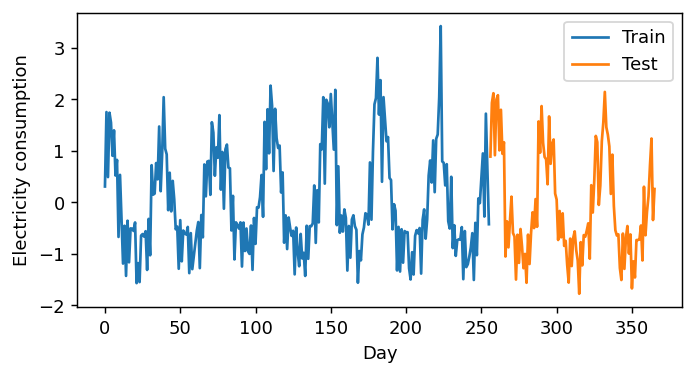

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
plt.figure(figsize = (6, 3), dpi =130)
plt.plot(X_train, y_train, label = 'Train')
plt.plot(X_test, y_test, label = 'Test')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Electricity consumption')
plt.show()


    
### END SOLUTION (do not delete this comment!)

Plot mean and confidence interval of the prediction.

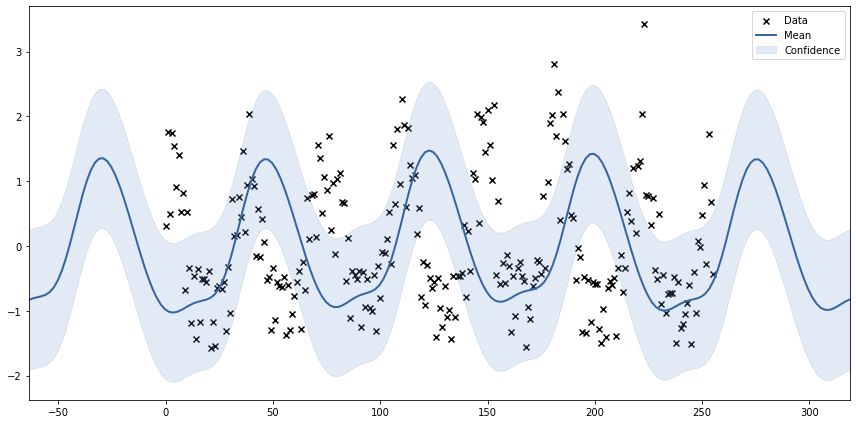

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)

lengthscale = 2.
varinace = 4.
main_kernel =  GPy.kern.RBF(1, varinace, lengthscale) + GPy.kern.Poly(1, varinace, order = 1) + GPy.kern.StdPeriodic(1, varinace)
noise_kernel = GPy.kern.White(1)

kernel = main_kernel + noise_kernel

model = GPRegression(X_train, y_train, kernel)
model.optimize()

model.plot(figsize = (12,6))
plt.show()


### END SOLUTION (do not delete this comment!))

Inspect them on normality by scatter plot: plot predicted points/time series against true values.

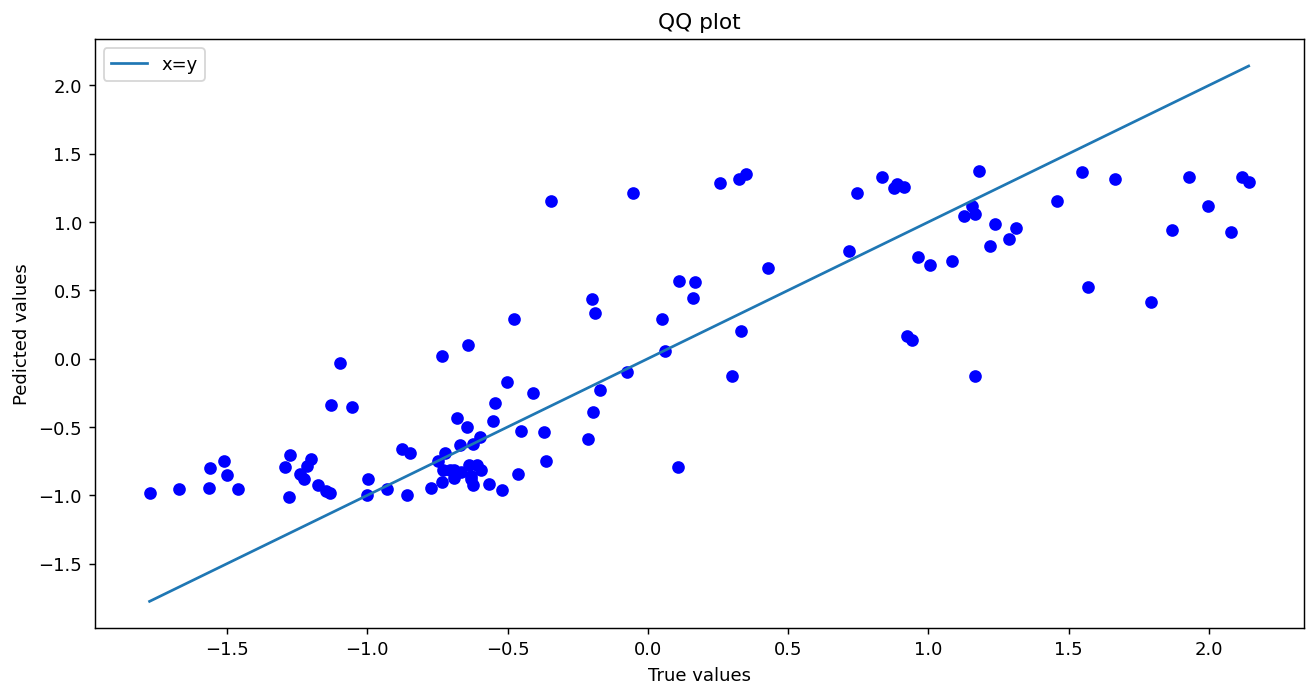

In [ ]:

### BEGIN SOLUTION (do not delete this comment!)

mean, var = model.predict(X_test)

plt.figure(figsize =(12, 6), dpi =130)
plt.scatter(y_test, mean, color = 'b')
x = np.linspace(y_test.min(), y_test.max())
plt.plot(x,x, label = 'x=y')
plt.xlabel('True values')
plt.ylabel('Pedicted values')
plt.title('QQ plot')
plt.legend()
plt.show()


### END SOLUTION (do not delete this comment!)

Estimate the prediction error with r2_score. R2-score accepted > 0.7 on test sample.

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.metrics import r2_score

print(f'R2-score: {r2_score(y_test, mean):.3f}')

#R2-score: 0.7170040302276215

### END SOLUTION (do not delete this comment!)

R2-score: 0.717


## Task 2 - MNIST, kMNIST component analysis and manifold learning. (5 pts.)

### Task 2.1. (1 pt)

Download `MNIST` dataset. Here we will estimate the data intrinsic dimensionality, decompose the dataset on principle components and estimate the cumulative explained variance by each component.

You can either use the [proposed method](https://www.stat.berkeley.edu/~bickel/mldim.pdf) for the estimation of sample intrinsic dimension or any other method (convenient for you). For the first case, yoyu may use the code from [here](https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4)

1. Estimate the intrinsic dimensionality of the dataset. Provide the plot.
2. Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with **6** different set of components and corresponding explained variance. You can choose any digit from the dataset.

In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

dg = datasets.load_digits()

scaler = StandardScaler().fit(dg.data)
data = scaler.transform(dg.data)

1) Estimate the intrinsic dimentionality of the dataset. Provide the plot.

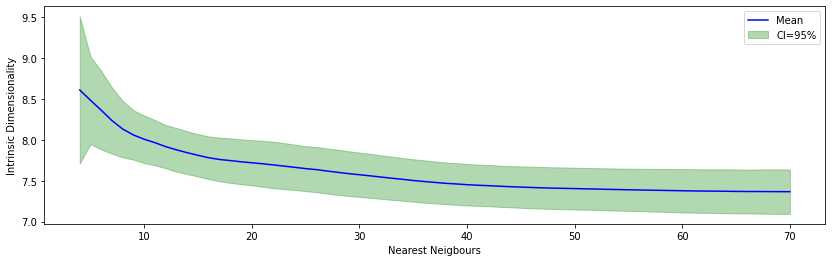

In [3]:
### BEGIN SOLUTION (do not delete this comment!)
# from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors

 
def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k+1).fit(X)
    dist, ind = neighb.kneighbors(X) # distances between the samples and points
    dist = dist[:, 1:] # the distance between the first points to first points (as basis ) equals zero
    # the first non trivial point
    dist = dist[:, 0:k]# including points k-1
    assert dist.shape == (X.shape[0], k) # requirments are there is no equal points
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1]) # dinstance betveen the bayeasan statistics
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample
 
def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1): # in order to reduse the noise by eliminating of the nearest neibours 
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k
 
def repeated(func, X, nb_iter=100, random_state=None, mode='bootstrap', **func_kw):
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []
 
    iters = range(nb_iter) 
    for i in iters:
        if mode == 'bootstrap':# and each point we want to resample with repeating points to reduse the errors 
            #232 111 133 
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results

import warnings
warnings.filterwarnings("ignore")

k1 = 4 # start of interval(included)
k2 = 70 # end of interval(included)
nb_iter = 100 # more iterations more accuracy
# intrinsic_dim_scale_interval gives better estimation
intdim_k_repeated = repeated(intrinsic_dim_scale_interval, 
                             data,
                             mode='bootstrap', 
                             nb_iter=nb_iter, # nb_iter for bootstrapping
                             random_state= 228,
                             k1=k1, k2=k2)
intdim_k_repeated = np.array(intdim_k_repeated)

x = np.arange(k1, k2+1)

plt.figure(figsize=(14, 4))
plt.plot(x, np.mean(intdim_k_repeated, axis=0), 'b', label='Mean') # it is the mean walue
plt.fill_between(x, 
                 np.mean(intdim_k_repeated, axis=0) - 
                 2 * np.std(intdim_k_repeated, axis=0),
                 np.mean(intdim_k_repeated, axis=0) + 
                 2 * np.std(intdim_k_repeated, axis=0),
                 alpha=0.3,
                 label='CI=95%',
                 color='g')
plt.xlabel("Nearest Neigbours")
plt.ylabel("Intrinsic Dimensionality")
plt.legend()
plt.show()

### END SOLUTION (do not delete this comment!)

2) Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with 6 different set of components and corresponding explained variance. You can choose any digit from the dataset.

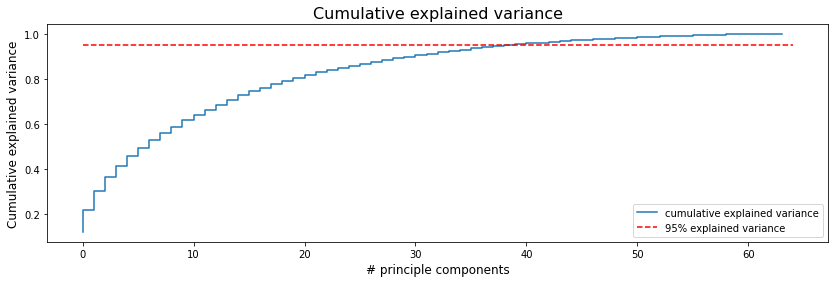

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.decomposition import PCA
pca = PCA().fit(data)

plt.figure(figsize=(14, 4))

plt.step(range(len(pca.components_)), np.cumsum(pca.explained_variance_ratio_), label='cumulative explained variance')
plt.title('Cumulative explained variance', fontsize=16)
plt.xlabel('# principle components', fontsize=12)
plt.ylabel('Cumulative explained variance', fontsize=12)

plt.legend(loc='lower right')
plt.hlines(y=0.95, xmin=0, xmax= len(pca.components_), colors='r', linestyles='dashed', label='95% explained variance')

plt.legend(loc = 'lower right')
plt.show()

### END SOLUTION (do not delete this comment!)

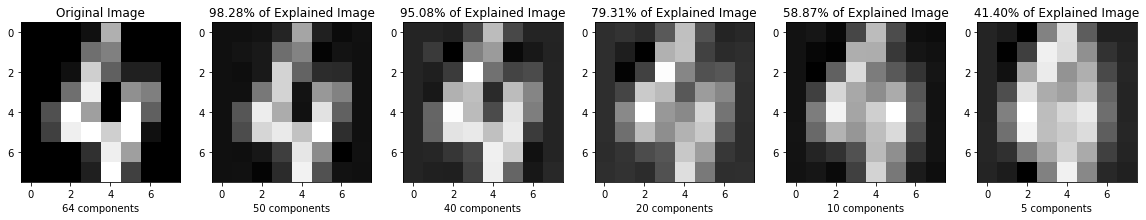

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
n_of_components = [64, 50, 40, 20, 10, 5]
fig, axes = plt.subplots(figsize = (20,10), ncols = 6)

for n_comp, ax in zip(n_of_components, axes.ravel()):
  # print(data.shape)
  # print(n_comp)
  # print(ax)
  pca = PCA(n_components = n_comp).fit(data)
  new_features = pca.transform(data)
  new_img = pca.inverse_transform(new_features)[4]
  new_img = scaler.inverse_transform(new_img[np.newaxis, :])
  new_img = new_img.reshape(8,8)
  # print(new_img.shape)
  # print(pca.explained_variance_ratio_)
  # print(np.sum(pca.explained_variance_ratio_))
  if n_comp == 64:
    ax.set_title('Original Image')
    ax.set_xlabel(f'{n_comp} components')
    ax.imshow(new_img, cmap='gray')
  else:
    ax.set_title(f'{100*(np.sum(pca.explained_variance_ratio_)):.2f}% of Explained Image')
    ax.set_xlabel(f'{n_comp} components')
    ax.imshow(new_img, cmap='gray')

### END SOLUTION (do not delete this comment!)


### Task 2.2. (1 pt.)

Here we will visualize the decomposition in order to observe how data diverges across different manifold learning methods. We are to compare `PCA`, `ICA` and `Isomap` non-linear decompositions [see more over here https://scikit-learn.org/stable/modules/manifold.html], and check the classification accuracy on the new features. 

1. Calculate new features on the data with ICA, PCA and Isomap. **Choose the number of components according to your estimation of intrinsic dimension**. Calculate the classification accuracy on these features with `LogisticRegression` on `cross_val=5` with $3$ repeats. Use `RepeatedKFold` and fit the `random_seed = 42`.
2. Show that the `Isomap` gives a statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. Justify your results, write down 2-3 sentences.


In [ ]:
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap

1) Calculate new features on the data with ICA, PCA and Isomap. Choose the number of components according to your estimation of intrinsic dimention. Calculate the classification accuracy on these features with LogisticRegression on cross_val=5 with  3  repeats. Use RepeatedKFold and fit the random_seed = 42.

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
num_components = 8

models = [PCA(n_components = num_components), 
          FastICA(n_components = num_components), 
          Isomap(n_components = num_components)]
log_reg = LogisticRegression(random_state= 42, n_jobs = -1)
rkf = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state= 42)

allscores = []
X = data
y = dg.target


for model in models:
  data_transform = model.fit_transform(X)
  scores = cross_val_score(estimator = log_reg, scoring = 'accuracy', X = data_transform, y = y, cv = rkf)
  #print(scores)
  allscores.append(scores)
  model_name = type(model).__name__
  print(f'{model_name}: {np.mean(scores)}')


### END SOLUTION (do not delete this comment!)


PCA: 0.8727499226245744
FastICA: 0.7150943980191891
Isomap: 0.9530625193438564


2) Show that the `Isomap` gives statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. 

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
value, p_value = stats.ttest_rel(allscores[-1], allscores[0])
print( f'T test with alternative hypothesis that Isomap has greater accuracy than PCA')
print(f'Statistic: {value} p_value: {p_value}' )


value, p_value = stats.ttest_rel(allscores[-1], allscores[1])
print( f'T test with alternative hypothesis that Isomap has greater accuracy than FastICA')
print(f'Statistic: {value} p_value: {p_value} ')

### END SOLUTION (do not delete this comment!)

T test with alternative hypothesis that Isomap has greater accuracy than PCA
Statistic: 15.671124719961904 p_value: 2.848260660546901e-10
T test with alternative hypothesis that Isomap has greater accuracy than FastICA
Statistic: 22.465930993294286 p_value: 2.2115420163055773e-12 


### Task 2.3. (1 pt.)

3) Justify your results, write down 2-3 senteces.

*BEGIN SOLUTION (do not delete this comment!)*

The PCA method and FastICA are linear methods used for finding a suitable projection of data. However, when dealing with complex image data, Isomap outperforms these methods because it is non-linear. Although PCA and FastICA can also achieve high accuracy (above .90) if more components are used, this requires storing more data, which may not be desirable. In both cases of comparison using the T-test, the p-value for the PCA and FastICA methods was found to be below the significance criterion of 0.05. This indicates that the Isomap method provides a significant enhancement in classification accuracy.

*END SOLUTION (do not delete this comment!)*

### Task 2.4. kMNIST dimensionality reduction. (2 pts.)

Explore `KMNIST` dataset https://github.com/rois-codh/kmnist. You are to engineer new features (by using any familiar to you method of Manifold Learning) to increase the classification accuracy. Use the `KNN` classifier with any hyperparameters you like.

1. __(2 pt.)__ Get accuracy on `test_set` more than 93%`. 

**NOTE** that the data is rather heavy, thus your decomposition will take a while.

__Hint:__ Try to use dimensionality reduction methods, which yield better model performance on `MNIST`. These methods can compete with Autoencoders on `torch`. 

1) Get accuracy on test_set more than 93%.

In [ ]:
import numpy as np

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load('kmnist-train-imgs.npz')
x_test = load('kmnist-test-imgs.npz')
y_train = load('kmnist-train-labels.npz')
y_test = load('kmnist-test-labels.npz')

# Reshape the data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
n_components_grid = range(10, 200, 30)

clf = KNeighborsClassifier(n_neighbors=5, n_jobs = -1)

best_accuracy = 0

for n_comp in n_components_grid:
  pca = PCA(n_components = n_comp).fit(x_train)

  x_train_transform = pca.transform(x_train)
  x_test_transform = pca.transform(x_test)

  clf.fit(x_train_transform, y_train)
  y_pred = clf.predict(x_test_transform)

  accuracy = accuracy_score(y_test, y_pred)

  if accuracy > best_accuracy:
    best_accuracy = accuracy
    n_components = n_comp
  
  if accuracy > 0.93:
    break
  

print(f'Test accuracy {best_accuracy} with {n_components} components')

### END SOLUTION (do not delete this comment!)

Test accuracy 0.9305 with 40 components


## Task 3 - Clustering (2 pts.)

### Task 3.1. Explore KMeans and Gaussian Mixture algorithms (1 pt.)

Try **KMeans, Gaussian Mixture** and **two** more clustering algorithms from sklearn. 
To evaluate clustering performance use **two** clustering metrics: *silhouette score*
and *mutual information* or *adjusted mutual information*.

For each algorithm **your task** is to try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`:
1. Apply the algorithm with the true number of clusters and try out at least two **other variants** of the number of clusters: a smaller and a larger one than the true number.;
2. For each number of clusters **visualize the clustering result**, calculate the **clustering metrics** and plot them;

__NOTE:__ `sklearn.model_selection.GridSearchCV` does not support clustering methods, thus you suppose to do it manually.

In [ ]:
import numpy as np

True number of clusters is 15


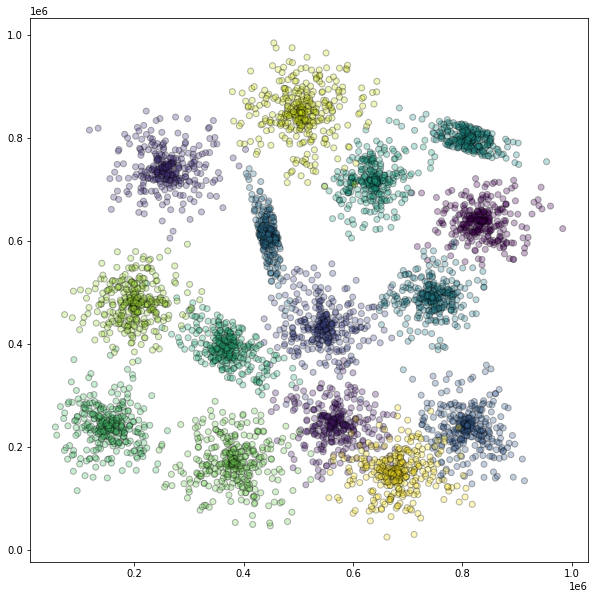

In [ ]:
points, labels = np.loadtxt('clustering.txt'), np.loadtxt('clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format(np.max(labels)))
plt.figure(figsize=(10, 10))
plt.scatter(points[:,0], points[:,1], c=labels, alpha=0.3, edgecolor='k')

plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, mutual_info_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

1) For each algorithm your task is to try to find the parameters leading to the best performance for n_clusters=true_number_of_clusters

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering


true_number_of_clusters = np.max(labels)
seed = 42

param_grid = {
    'KMeans': {
        'n_clusters': [true_number_of_clusters],
        'init': ['k-means++', 'random'],
        'random_state': [seed],
        'algorithm': ['lloyd', 'elkan', 'full']},
    'GaussianMixture': {
        'n_components': [true_number_of_clusters],
        'init_params': ['kmeans','k-means++', 'random'],
        'random_state': [seed],
        'covariance_type': ['full', 'tied', 'diag', 'spherical']},
    'Birch': {
        'n_clusters': [true_number_of_clusters],
        'threshold': [0.1, 0.3, 0.5, 0.7, 0.9, 1.1], 
        'branching_factor': [5, 10, 25, 50, 75]},

    'AgglomerativeClustering': {
        'n_clusters': [true_number_of_clusters],
        'linkage': ['ward', 'complete', 'average', 'single'],
        #'affinity': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
        } 
}

def GridSearch(model, param_grid, X, y, cv = 5):
  best_score = 0
  gridsearch_results = {'silhouette_score': [],
                        'mutual_info_score': []}
  skf = StratifiedKFold(n_splits = cv)


  param_grid = ParameterGrid(param_grid)
  #print(param_grid)
  for params in param_grid:
    #print(params)
    clf = model(**params)
    score_silhouette = []
    score_mutualinfo = []
    for train_index, test_index in skf.split(X,y):
      X_train, y_train = X[train_index], y[train_index]
      X_test, y_test = X[test_index], y[test_index]
      if type(clf).__name__ == 'AgglomerativeClustering':
        y_pred = clf.fit_predict(X_test)
        # clf.fit(X)
        # y_pred = LabelEncoder().fit_transform(clf.labels_)
      else:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

      score_silhouette.append(silhouette_score(X_test, y_pred))
      score_mutualinfo.append(mutual_info_score(y_test, y_pred))
      #print(score_silhouette)

    gridsearch_results['silhouette_score'].append(np.mean(score_silhouette))
    gridsearch_results['mutual_info_score'].append(np.mean(score_mutualinfo)) 
    #print(gridsearch_results)


  best_silhouette_score = max(gridsearch_results['silhouette_score'])
  best_indeex = gridsearch_results['silhouette_score'].index(best_silhouette_score)
  best_mutualinfo_score = gridsearch_results['mutual_info_score'][best_indeex]
  best_params = param_grid[best_indeex]

  return best_params, best_silhouette_score, best_mutualinfo_score
    


models_list = [KMeans, GaussianMixture, Birch, AgglomerativeClustering]
best_clustor_method = dict()

for name, model in zip(param_grid.keys(), models_list):
  best_params, best_silhouette_score, best_mutualinfo_score = GridSearch(model, param_grid[name], points, labels)
  best_clustor_method[f'{name}'] = best_params
  print(f'{name}')
  print(f'\tbest params: {best_params}')
  print(f'\tsilhouette_score: {round(best_silhouette_score,3)}')
  print(f'\tmutual_info_score: {round(best_mutualinfo_score,3)}')


### END SOLUTION (do not delete this comment!)

KMeans
	best params: {'random_state': 42, 'n_clusters': 15, 'init': 'k-means++', 'algorithm': 'lloyd'}
	silhouette_score: 0.625
	mutual_info_score: 2.575
GaussianMixture
	best params: {'random_state': 42, 'n_components': 15, 'init_params': 'kmeans', 'covariance_type': 'tied'}
	silhouette_score: 0.586
	mutual_info_score: 2.492
Birch
	best params: {'threshold': 0.1, 'n_clusters': 15, 'branching_factor': 5}
	silhouette_score: 0.605
	mutual_info_score: 2.514
AgglomerativeClustering
	best params: {'n_clusters': 15, 'linkage': 'average'}
	silhouette_score: 0.611
	mutual_info_score: 2.521


2) Apply the algorithm with the true number of clusters and try out at least two other variants of the number of clusters: a smaller and a larger one than the true number.;

 Do not forget that despite the plot picturing just the KMeans and GuassianMizture, you will need to ADDITIONALLY try put and plot two other clustering methods. 

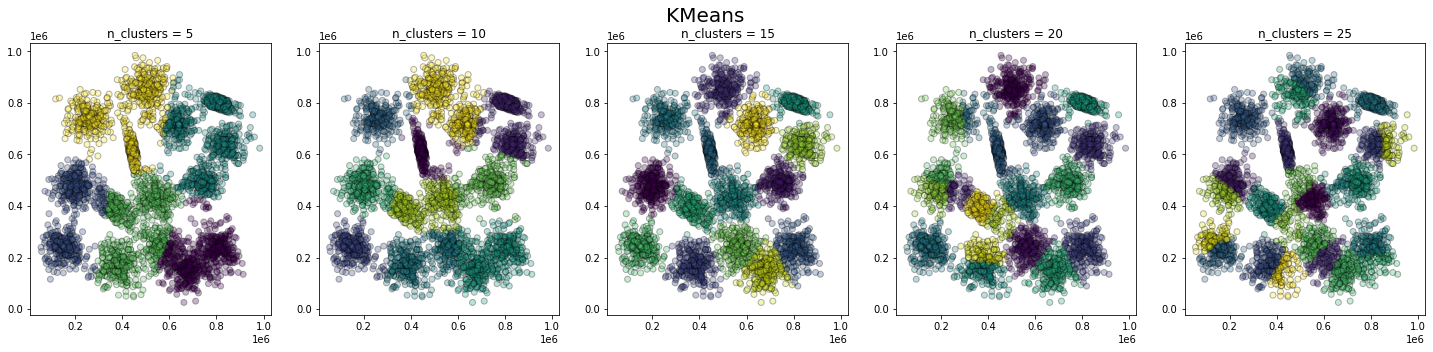

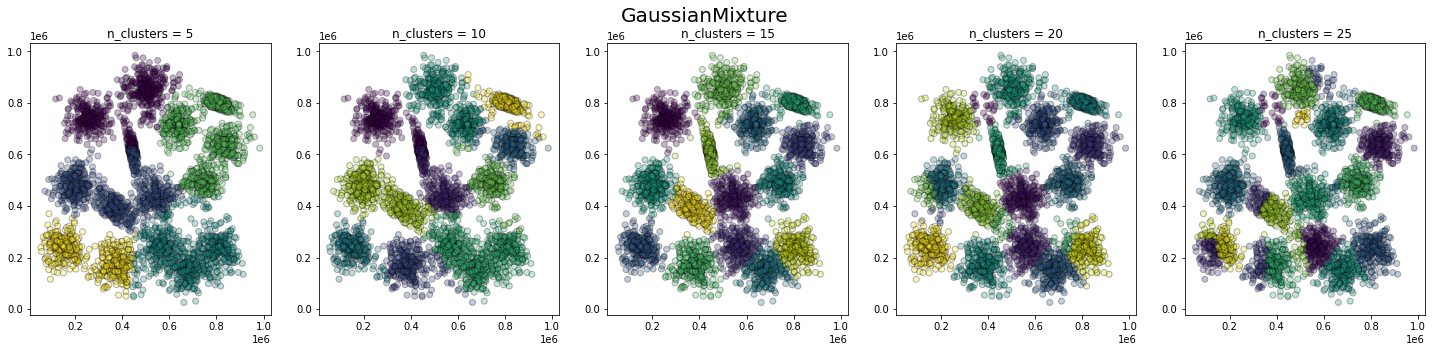

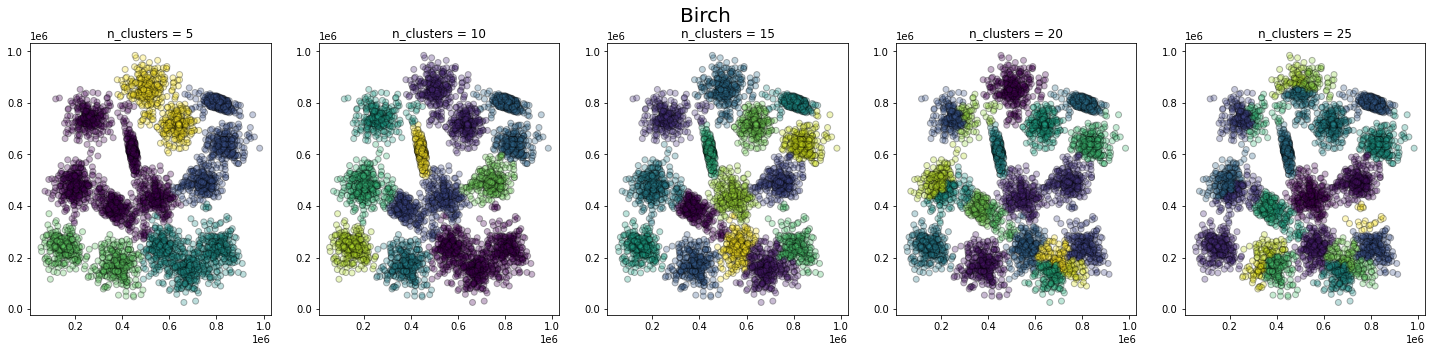

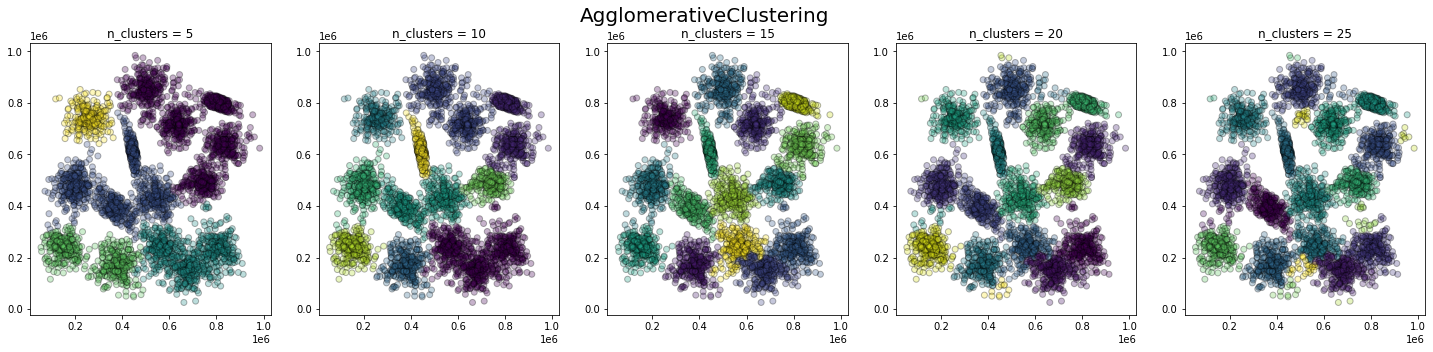

In [ ]:
## BEGIN SOLUTION (do not delete this comment!)
n_of_clusters =[5, 10, 15, 20, 25]
model_list = [
    KMeans, GaussianMixture, Birch, AgglomerativeClustering
]

# model_dict = {
#     'KMeans': {
#         'random_state': 42,
#          'n_clusters': 15, 
#          'init': 'k-means++',
#          'algorithm': 'lloyd'},
#     'GaussianMixture': {
#         'random_state': 42,
#         'init_params': 'kmeans',
#          'covariance_type': 'tied'},
#     'Birch': {
#         'threshold': 0.1, 
#          'branching_factor': 5},
#     'AgglomerativeClustering': {
#         'linkage': 'average'} 
# }

scores_dict = {
  model_name: {
      'silhouette_score': [],
      'mutual_info_score': [] } 
  for model_name in best_clustor_method.keys()}
labels_dict = {
    model_name: {
        n: [] for n in n_of_clusters}
    for model_name in best_clustor_method.keys()}


for model_name, model in zip(best_clustor_method.keys(), model_list):
  for n in n_of_clusters:
    if model_name == 'GaussianMixture':
      best_clustor_method['GaussianMixture']['n_components'] = n
    else:
      best_clustor_method[model_name]['n_clusters'] = n
    best_params = best_clustor_method[model_name]
    y_pred = model(**best_params).fit_predict(points)

    scores_dict[model_name]['silhouette_score'].append(silhouette_score(points, y_pred))
    scores_dict[model_name]['mutual_info_score'].append(mutual_info_score(labels, y_pred))
    labels_dict[model_name][n] = y_pred

for model_name, model in zip(best_clustor_method.keys(), model_list):
  n_cols = len(n_of_clusters)
  fig, ax = plt.subplots(ncols = n_cols, figsize = (25, 5))
  for i, n in enumerate(n_of_clusters):
    ax[i].scatter(points[:,0], points[:,1], c=labels_dict[model_name][n], alpha=0.3, edgecolor='k')
    ax[i].set_title(f'n_clusters = {n}')
  fig.suptitle(model_name, fontsize = 20)
  plt.show()

### END SOLUTION (do not delete this comment!)

2) For each number of clusters vizualize the clustering result, calculate the clustering metrics and plot them;


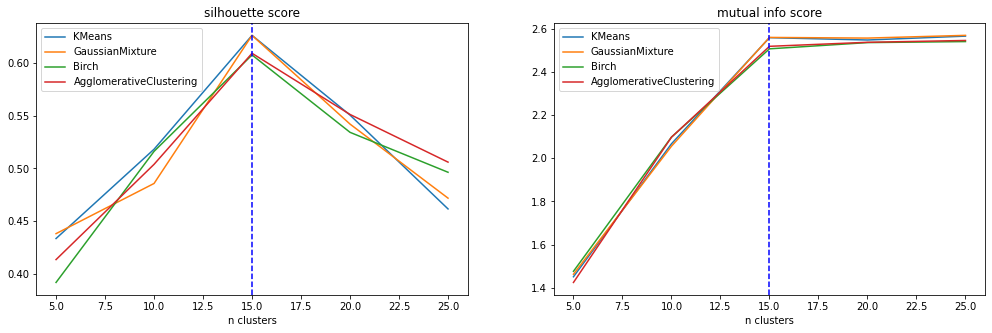

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize =(17,5))

for model_name in best_clustor_method.keys():
  ax1.plot(n_of_clusters, scores_dict[model_name]['silhouette_score'], label = model_name)
  ax2.plot(n_of_clusters, scores_dict[model_name]['mutual_info_score'], label = model_name)

ax1.axvline(x=true_number_of_clusters, color = 'b', ls = '--')
ax2.axvline(x=true_number_of_clusters, color = 'b', ls = '--')
ax1.set_title('silhouette score')
ax2.set_title('mutual info score')
ax1.set_xlabel('n clusters')
ax2.set_xlabel('n clusters')
ax1.legend()
ax2.legend()

### END SOLUTION (do not delete this comment!)

### Task 3.2. Finding the Number of Clusters with Bootstrap. (1 pt.)
For a chosen algorithm find the best number of clusters using bootstrap. Based on your observations made at the previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**.
1. Estimate variance of the clustering metric of your choice (i.e. *silhouette score*/*mutual information*/*adjusted mutual information*)and construct normal 95% **confidence interval (CI)**;
2. **Plot the metric** with the corresponding confidence intervals and show the best number of clusters.

__Hints:__ 
- you can choose bootstrap samples with any size, and sample number starting from `50`;
- you can use `scipy.stats.norm.interval()` to derive CI;

1) Estimate variance of the clustering metric of your choice (i.e. silhouette score/mutual information/adjusted mutual information)and construct normal 95% confidence interval (CI);

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.utils import resample
from scipy import stats

best_params = best_clustor_method['KMeans']
model = KMeans(**best_params)
n_samples = 50
left_intervals_list = []
right_intervals_list = []
mean_scores = []
for n_clusters in tqdm(range(10, 20, 1)):
  model = KMeans(**best_params)
  model.set_params(n_clusters=n_clusters)
  # print(model.get_params())
  scores = []
  #bootstrap
  for _ in range(n_samples):
    new_points = resample(points, n_samples=2048)
    y_pred = model.fit_predict(new_points)
    scores.append(silhouette_score(new_points,y_pred))
  mean = np.mean(scores)
  var = np.var(scores)

  mean_scores.append(mean)
  print('\nNumber of clusters:', n_clusters)
  print(f'\tVariance: {var}')
  intervals = stats.norm.interval(.95, loc=mean, scale=np.std(scores))
  left_intervals_list.append(intervals[0])
  right_intervals_list.append(intervals[1])
  print(f'\tConfidence interval: ({intervals[0]}, {intervals[1]})')



### END SOLUTION (do not delete this comment!)

 10%|█         | 1/10 [00:30<04:33, 30.43s/it]


Number of clusters: 10
	Variance: 8.115942394129457e-05
	Confidence interval: (0.5014512447968504, 0.5367652978059141)


 20%|██        | 2/10 [00:40<02:29, 18.74s/it]


Number of clusters: 11
	Variance: 7.252653065265347e-05
	Confidence interval: (0.5223576964181837, 0.5557407868029867)


 30%|███       | 3/10 [00:51<01:43, 14.85s/it]


Number of clusters: 12
	Variance: 4.7411454637098155e-05
	Confidence interval: (0.5497931939580966, 0.5767842406675238)


 40%|████      | 4/10 [01:10<01:40, 16.67s/it]


Number of clusters: 13
	Variance: 4.497990463262688e-05
	Confidence interval: (0.5728554331221833, 0.5991452373363637)


 50%|█████     | 5/10 [01:22<01:14, 14.95s/it]


Number of clusters: 14
	Variance: 4.870003108154803e-05
	Confidence interval: (0.5982190692841513, 0.6255744463765104)


 60%|██████    | 6/10 [01:33<00:54, 13.50s/it]


Number of clusters: 15
	Variance: 3.560233662854635e-05
	Confidence interval: (0.6136889122992802, 0.6370782184094709)


 70%|███████   | 7/10 [01:44<00:37, 12.61s/it]


Number of clusters: 16
	Variance: 5.028058442546423e-05
	Confidence interval: (0.5997021505508803, 0.6274978908396983)


 80%|████████  | 8/10 [01:56<00:25, 12.55s/it]


Number of clusters: 17
	Variance: 9.822640708111627e-05
	Confidence interval: (0.5743456539139544, 0.613195760627159)


 90%|█████████ | 9/10 [02:10<00:12, 12.91s/it]


Number of clusters: 18
	Variance: 0.00010019987748209294
	Confidence interval: (0.5596722765277082, 0.5989107119290367)


100%|██████████| 10/10 [02:23<00:00, 14.31s/it]


Number of clusters: 19
	Variance: 0.00011196707444397297
	Confidence interval: (0.5430410888403889, 0.5845196088597973)


2) Plot the metric with the corresponding confidence intervals and show the best number of clusters.

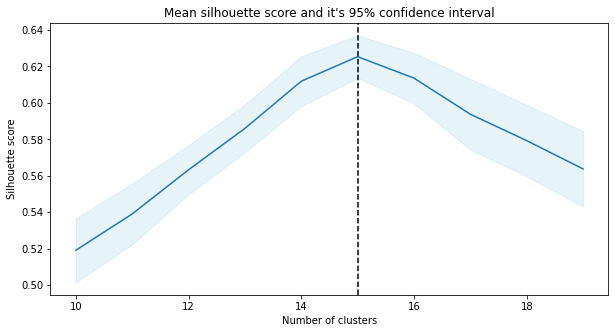

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
plt.figure(figsize=(10,5))

plt.plot(range(10, 20, 1), mean_scores, label='Prediction')
plt.axvline(15, color='k',linestyle='--', label='n_clusters=15')
plt.fill_between(range(10, 20, 1), left_intervals_list,
                     right_intervals_list, alpha=0.3,  label='CI=95%', color='lightblue')

plt.title("Mean silhouette score and it's 95% confidence interval")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")

plt.show() 

### END SOLUTION (do not delete this comment!)

## Task 4. Practice with Different Anomaly Detection Algorithms. (2 pts)

### Task 4.1 (1 pt)

- Here we will use __fraud_dataset__ (creditcard.csv )
- Compute the __contamination__ (or impurity) on the **test** set as the ratio of anomaly objects to all the objects.  
- Predict the anomaly with any **three** Anomaly detection methods among ones from: https://scikit-learn.org/stable/modules/outlier_detection.html, note, we do not use true labels to fit anomaly detectors.
- Explore, how the `roc_auc_score` for anomaly detectors changes with `contamination` value, taking a grid `[0.1*contamination, 1*contamination, 10*contamination]`. Point out the best performing algorithm.

In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score

data = pd.read_csv('creditcard.csv')

X = data.drop(columns="Class")
y = data["Class"]

# keep the split fixed
tt_split = train_test_split(X, y, test_size = 0.1, stratify=y, random_state= 42)
train_X, test_X, train_y, test_y = tt_split 

# delete the targets for training
train_y = 0

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
  
# impurity estimation on test data
contamination = test_y.mean()
contamination

### END SOLUTION (do not delete this comment!)

0.01693743518838576

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

# Choose three anomaly detection models
models_list = [IsolationForest(n_jobs = -1),
          OneClassSVM(kernel = 'rbf'),
          LocalOutlierFactor(novelty=True, n_jobs = -1)
          ]

for i in [0.1, 1, 10]:
  for model in models_list:
    if type(model).__name__ == 'OneClassSVM':
      model.set_params(nu=contamination*i)
    else:
      model.set_params(contamination=contamination*i)
    
    model.fit(train_X)
    y_pred = model.predict(test_X)
    labels_isolation = (1-y_pred)/2

    print(f'{type(model).__name__}:')
    print(f'\tContamination: {round(contamination*i, 3)}')
    print(f'\tROC/AUC: {round(roc_auc_score(labels_isolation, test_y), 3)}')
    print(f'\tPrecision: {round(precision_score(labels_isolation, test_y, average="weighted"), 3)}')
    

### END SOLUTION (do not delete this comment!)

IsolationForest:
	Contamination: 0.002
	ROC/AUC: 0.992
	Precision: 0.999
OneClassSVM:
	Contamination: 0.002
	ROC/AUC: 0.492
	Precision: 0.994
LocalOutlierFactor:
	Contamination: 0.002
	ROC/AUC: 0.492
	Precision: 0.997
IsolationForest:
	Contamination: 0.017
	ROC/AUC: 0.79
	Precision: 0.986
OneClassSVM:
	Contamination: 0.017
	ROC/AUC: 0.491
	Precision: 0.956
LocalOutlierFactor:
	Contamination: 0.017
	ROC/AUC: 0.5
	Precision: 0.959
IsolationForest:
	Contamination: 0.169
	ROC/AUC: 0.542
	Precision: 0.848
OneClassSVM:
	Contamination: 0.169
	ROC/AUC: 0.501
	Precision: 0.73
LocalOutlierFactor:
	Contamination: 0.169
	ROC/AUC: 0.501
	Precision: 0.717


### Task 4.2 (1 pt)

The idea is to see when anomaly detection methods, trained with no labels, can facilitate the prediction of the classifier. Imagine a real case scenario: you have labelled only a small portion of the dataset and a bunch of unlabeled data. We will simulate the situation when __90%__ of data is unlabeled and we still desire to achieve good performance. 


As you can score your predictions only on the __10%__ of the sample, you better do it in cross validation to ensure the model stability.
1. Take your favorite classifier and estimate the performance on __test set__ using `StratifiedKFold(n_splits=10, random_state = 42)` with `roc_auc` and `precision_score`. You can use test set upsampling and other instruments to enforce your prediction. 

> Do not get confused, here we swap __train__ and __test__ and use __test__ as if it's the only data we have on our hands.

2. Try to enhance the classifier performance in  `roc_auc` or `precision_score` (or ideally both), building the ensemble, using __Anomaly detection__ methods from the previous task. You can fit __Anomaly detection__ methods on both  __training set__ and subset from __test set__ on the cross-validation fold.

__NOTE:__ try not to overfit, thus not adjust the `contamination` while training, and refit classifiers on each fold. 

__Hints:__ `sklearn.ensemble.VotingClassifier` does not support Anomaly detection methods, so you are to write it yourself. And `np.logical_and` or `np.logical_or` will suit for the trivial ensemble.

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)

# choose your favorite classifier, e.g. from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

skf = StratifiedKFold(n_splits=10, random_state = 42, shuffle=True)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = [] 
pr_score = []

log_reg = LogisticRegression(random_state = 42, n_jobs = -1)

for train_index, test_index in skf.split(test_X, test_y):

    X_train, y_train = test_X.values[train_index], test_y.values[train_index]
    X_test, y_test = test_X.values[test_index], test_y.values[test_index]
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    roc_auc_scores.append(roc_auc_score(y_pred, y_test))
    pr_score.append(precision_score(y_pred, y_test, average="weighted"))

print(f'ROC/AUC mean: {np.mean(roc_auc_scores)} std: {np.std(roc_auc_scores)}')
print(f'Precision mean: {np.mean(pr_score)} std: {np.std(pr_score)}')
    
### END SOLUTION (do not delete this comment!)

ROC/AUC mean: 0.9162937203005411 std: 0.10789635499365513
Precision mean: 0.9934523706017592 std: 0.0058774272744121355


Try to enhance the classifier performance using Anomaly detection methods

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)

skf = StratifiedKFold(n_splits=10, random_state = 42, shuffle=True)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = [] 
pr_score = []

anomaly_algorithm = IsolationForest(random_state = 42, n_jobs = -1, contamination = contamination)
log_reg = LogisticRegression(random_state = 42, n_jobs = -1)

for train_index, test_index in skf.split(test_X, test_y):
    
    X_train, y_train = test_X.values[train_index], test_y.values[train_index]
    X_test, y_test = test_X.values[test_index], test_y.values[test_index]

    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)

    anomaly_algorithm.fit(X_train)
    y_pred_anomaly = anomaly_algorithm.predict(X_test)
    labels_isolation = (1-y_pred_anomaly)/2

    # print('y_pred', y_pred)
    # print('labels_isolation', labels_isolation)

    aggreg_y_pred = np.logical_and(y_pred,labels_isolation)

    roc_auc_scores.append(roc_auc_score(aggreg_y_pred, y_test))
    pr_score.append(precision_score(aggreg_y_pred, y_test, average="weighted"))


print(f'ROC/AUC mean: {np.mean(roc_auc_scores)} std: {np.std(roc_auc_scores)}')
print(f'Precision mean: {np.mean(pr_score)} std: {np.std(pr_score)}')

### END SOLUTION (do not delete this comment!)

ROC/AUC mean: 0.9831481611627853 std: 0.037259946882941215
Precision mean: 0.9960747868670079 std: 0.0018223723045407533


Write 1-2 sentences on your findings.

I have used ''np.logical_or'' firstly, but for ROC/AUC it gaves worser results that using ''np.logical_and''. So i chose secand one. I can mentioned that using ensemble method its possible to improve Precision mean and ROC/AUC. If we don't have a lot of label data it could be helpful

*END SOLUTION (do not delete this comment!)*